In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### norm and lognorm

In [2]:
stats.norm.rvs(loc=0, scale=1, size=(10,))

array([ 1.67062554, -2.54791499,  0.81367954, -0.50756787, -1.1840764 ,
        0.52281531, -0.25960883,  0.7533444 ,  1.27577122, -0.69989629])

In [3]:
# lognorm takes s as a shape parameter for s.
stats.lognorm.rvs(loc=0, scale=1, size=(10,), s=0.5)

array([2.50708845, 1.6081621 , 1.09114528, 0.94558255, 1.06633494,
       0.81864496, 0.46011358, 0.85090039, 0.48529172, 0.466921  ])

In [4]:
# Percent point function (inverse of cdf — percentiles).
stats.norm.ppf(0.01)

-2.3263478740408408

In [5]:
a = stats.norm.rvs(loc=0, scale=1, size=(10,), random_state=42)
rv = stats.norm()
# rv.__dict__
rv.pdf(a)

array([0.35264231, 0.39514715, 0.32345711, 0.12508666, 0.38815426,
       0.38815575, 0.11464727, 0.29718021, 0.35731354, 0.34434052])

In [6]:
#Calculate the first four moments:

mean, var, skew, kurt = stats.norm.stats(moments='mvsk')
print("""
    mean : {}
    var : {}
    skew : {}
    kurt : {}
""".format(mean, var, skew, kurt))


    mean : 0.0
    var : 1.0
    skew : 0.0
    kurt : 0.0



### np.linspace

In [7]:
y = np.zeros(8)
y.shape

(8,)

In [8]:
## Returns num evenly spaced samples, calculated over the interval [start, stop].

# x1 = np.linspace(0,10, num=8, endpoint=True, retstep=True)
x1 = np.linspace(0,10, num=8, endpoint=True)
x2 = np.linspace(0,10, num=8, endpoint=False)
print(f'x1 --> {x1} \n')
print(f'x2 --> {x2}')

x1 --> [ 0.          1.42857143  2.85714286  4.28571429  5.71428571  7.14285714
  8.57142857 10.        ] 

x2 --> [0.   1.25 2.5  3.75 5.   6.25 7.5  8.75]


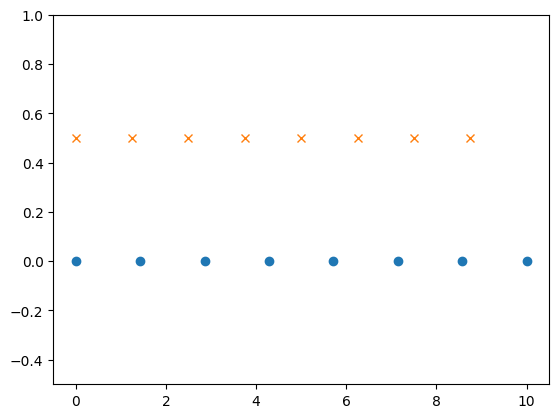

In [9]:
plt.plot(x1, y, 'o')
plt.plot(x2, y + 0.5, 'x')
plt.ylim((-0.5, 1));


In [10]:
x3 = np.linspace(stats.norm.ppf(0.01),
                stats.norm.ppf(0.99), 100)
x3

array([-2.32634787, -2.27935095, -2.23235402, -2.18535709, -2.13836017,
       -2.09136324, -2.04436631, -1.99736939, -1.95037246, -1.90337553,
       -1.85637861, -1.80938168, -1.76238475, -1.71538783, -1.6683909 ,
       -1.62139397, -1.57439705, -1.52740012, -1.48040319, -1.43340627,
       -1.38640934, -1.33941241, -1.29241549, -1.24541856, -1.19842163,
       -1.15142471, -1.10442778, -1.05743085, -1.01043393, -0.963437  ,
       -0.91644007, -0.86944314, -0.82244622, -0.77544929, -0.72845236,
       -0.68145544, -0.63445851, -0.58746158, -0.54046466, -0.49346773,
       -0.4464708 , -0.39947388, -0.35247695, -0.30548002, -0.2584831 ,
       -0.21148617, -0.16448924, -0.11749232, -0.07049539, -0.02349846,
        0.02349846,  0.07049539,  0.11749232,  0.16448924,  0.21148617,
        0.2584831 ,  0.30548002,  0.35247695,  0.39947388,  0.4464708 ,
        0.49346773,  0.54046466,  0.58746158,  0.63445851,  0.68145544,
        0.72845236,  0.77544929,  0.82244622,  0.86944314,  0.91

In [11]:
x = stats.norm.rvs(size=1000)

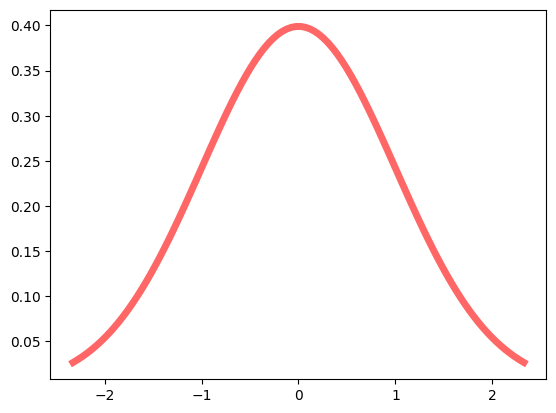

In [13]:
plt.plot(x3, stats.norm.pdf(x3),'r-', lw=5, alpha=0.6, label='norm pdf');

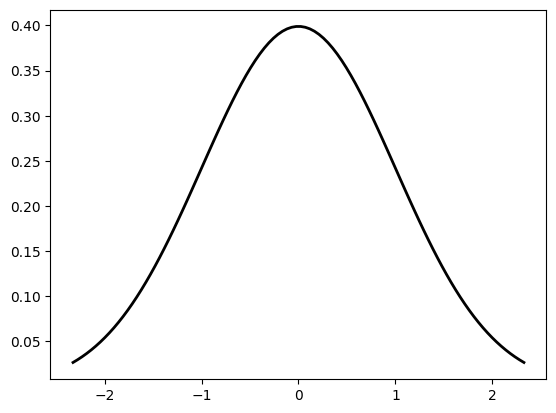

In [14]:
plt.plot(x3, rv.pdf(x3), 'k-', lw=2, label='frozen pdf');

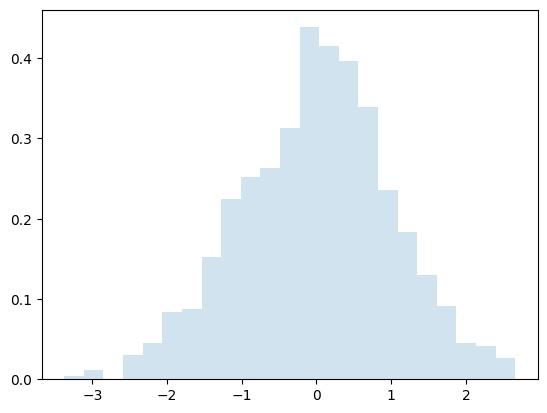

In [15]:
plt.hist(x, density=True, bins='auto', histtype='stepfilled', alpha=0.2);

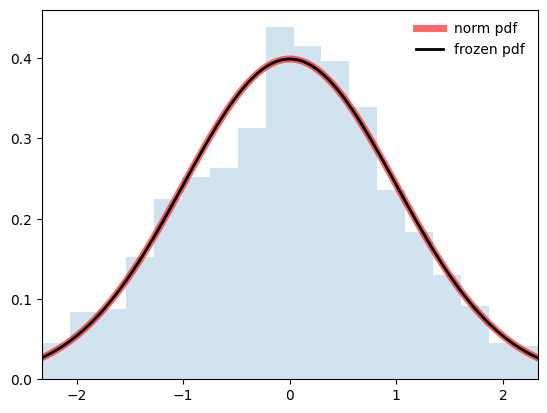

In [25]:
fig, ax = plt.subplots(1, 1)
ax.hist(x, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.plot(x3, stats.norm.pdf(x3),'r-', lw=5, alpha=0.6, label='norm pdf')
ax.plot(x3, rv.pdf(x3), 'k-', lw=2, label='frozen pdf')
ax.set_xlim([x3[0], x3[-1]])
ax.legend(loc='best', frameon=False);

### Q-Q plot

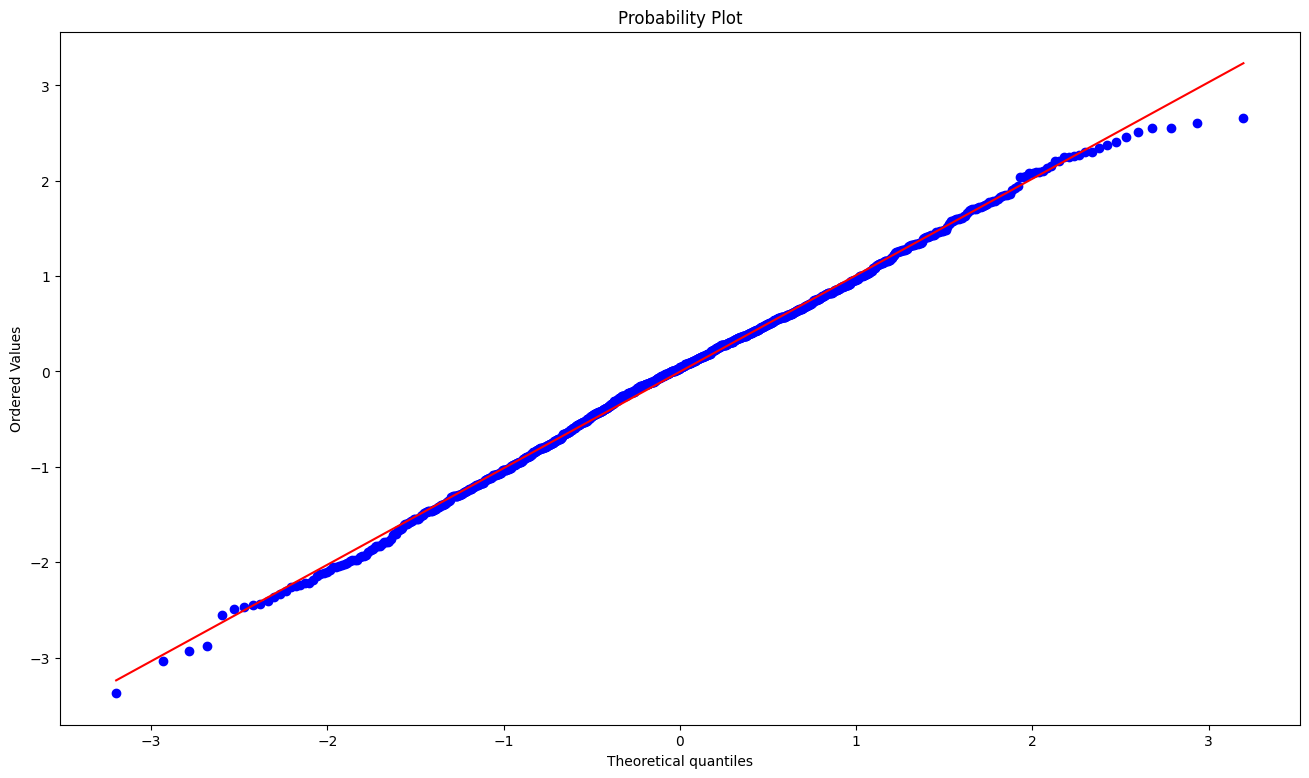

In [33]:
plt.figure(figsize=(16,9))
stats.probplot(x, dist='norm', plot=plt);

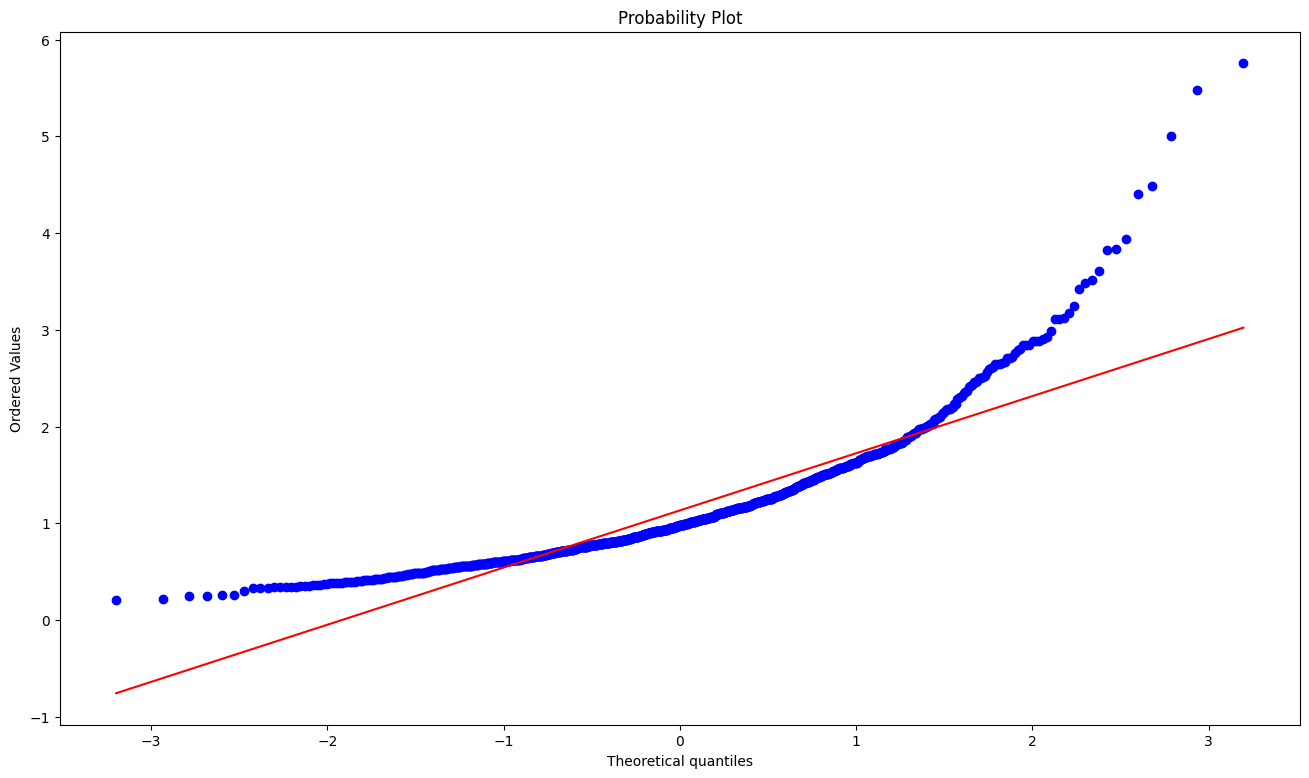

In [34]:
z = stats.lognorm.rvs(s=0.5, size=1000)
plt.figure(figsize=(16,9))
stats.probplot(z, dist='norm', plot=plt);